In [1]:
from sklearn.model_selection import train_test_split # Library for separating samples for training and testing, training learning curve and to process cross-validation
from sklearn.neural_network import MLPRegressor # Library for using the MLP Regressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Library used for data normalization
from sklearn.pipeline import Pipeline # Library for organizing actions in sequence
from sklearn.model_selection import GridSearchCV # Library to find the best model training solution
from sklearn import metrics # Library for evaluating metrics in the model
import matplotlib.pyplot as plt # To visualize data through graphs
import numpy as np # Numpy array manipulation library
import pandas as pd # Library for data manipulation, here specifically for importing and initial manipulation of the dataset
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib
from google.colab import drive # Library for colab interaction with drive
drive.mount('/content/drive') # Mounting Google Drive on the same Google Colab account

Mounted at /content/drive


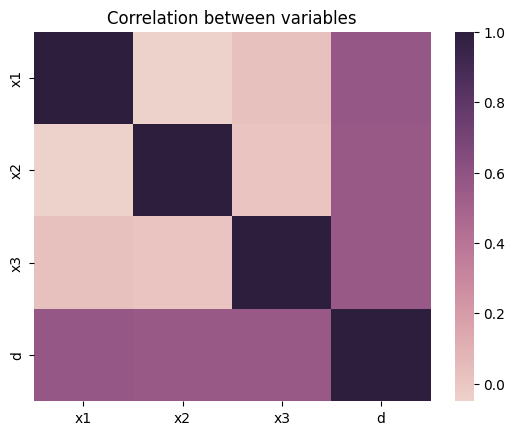

In [95]:
# Dataset path and creation of the variable df with pandas
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/atividade_MLPRegressor/ressonanciaMLP.csv")

# Generates a matrix graph to present the correction between the input variables of the dataset
ax = sns.heatmap(df.corr(numeric_only = True), annot = False, cmap = sns.cubehelix_palette(as_cmap = True))
ax.set_title('Correlation between variables')
ax = ax

In [77]:
x = df.drop('d', axis=1) # Deleting the price variable from entries
y = df['d'] # Inclusion of the price variable in the vector of desired outputs

In [78]:
# Separation of the dataset into samples for training and testing, considering 30% of the values ​​for testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [86]:
# Creation of the pipeline to accumulate actions in sequence
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(tol=0.0000001, n_iter_no_change=10, random_state=12))
])

In [87]:
# Creation of a grid to apply different values ​​to the activation function parameters and determine the best result
param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'mlp__hidden_layer_sizes': [(5,), (10,), (15,)],
    'mlp__activation': ['tanh', 'relu', 'logistic'],
    'mlp__solver': ['adam', 'sgd'],
    'mlp__learning_rate_init': [0.01],
    'mlp__max_iter': [1000]
}

In [88]:
# Customizing gridsearch
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

# Training the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp',
                                        MLPRegressor(random_state=12,
                                                     tol=1e-07))]),
             n_jobs=-1,
             param_grid={'mlp__activation': ['tanh', 'relu', 'logistic'],
                         'mlp__hidden_layer_sizes': [(5,), (10,), (15,)],
                         'mlp__learning_rate_init': [0.01],
                         'mlp__max_iter': [1000],
                         'mlp__solver': ['adam', 'sgd'],
                         'scaler': [StandardScaler(), MinMaxScaler()]})

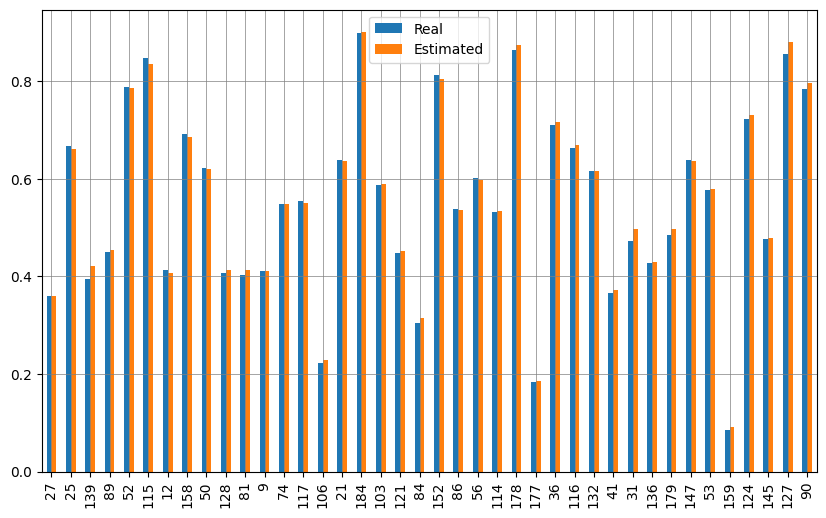

In [96]:
# predict() performs the prediction of outputs based on the model trained in the previous step with data not presented in the ANN training, but based on gridsearch
y_pred = grid_search.best_estimator_.predict(X_test)

# Creation of a dataframe with the desired data and those estimated in the prediction
df_temp = pd.DataFrame({'Real': y_test, 'Estimated': y_pred})

# Stores the number of elements to be presented in the chart, as it can be visually difficult to abstract if there is a lot of information
df_temp = df_temp.head(40)

# Setting the 'bar' chart type and figure size, then comparing the results
df_temp.plot(kind='bar', figsize=(10, 6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue')
plt.show()

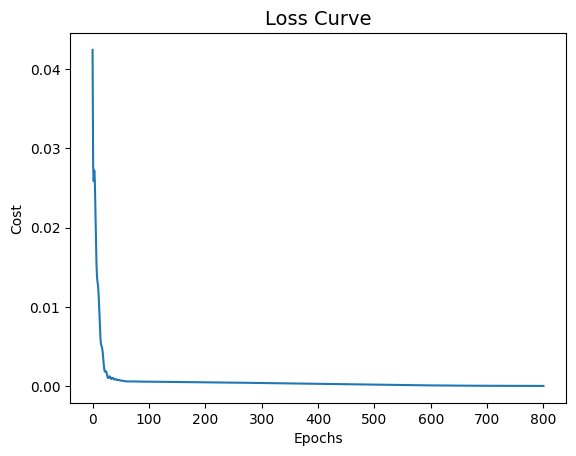

In [97]:
# Relationship between the created pipeline "mlp" and the gridsearch "param_grid", storing in this variable the best MLPRegressor model found
best_mlp = grid_search.best_estimator_.named_steps['mlp']

# Loss curve plotting
plt.plot(best_mlp.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

In [92]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('R2: ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 0.0062212398157495295
Mean Squared Error (MSE): 7.448274061164766e-05
Root Mean Squared Error (RMSE): 0.008630338383380322
Mean Absolute Percentage Error (MAPE): 0.012328767609768252
R2:  0.9979383369638117


In [98]:
# Best model found
best_params = grid_search.best_params_
print("\nBest model found:")
print(f"  Epochs (max_iter): {best_params['mlp__max_iter']}")
print(f"  Neurons (hidden_layer_sizes): {best_params['mlp__hidden_layer_sizes']}")
print(f"  Activation Function (activation): {best_params['mlp__activation']}")


Best model found:
  Epochs (max_iter): 1000
  Neurons (hidden_layer_sizes): (15,)
  Activation Function (activation): tanh
